In [46]:
import pandas as pd
import numpy as np
import os
from datetime import datetime as dt
from dateutil.relativedelta import relativedelta

import seaborn as sns
import matplotlib.pyplot as plt


# additional settings
pd.options.display.float_format = '{:.5f}'.format

In [4]:
raw_df = pd.read_parquet('.\\raw_data\\yellow_tripdata_2022-01.parquet')

In [5]:
raw_df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.00000,3.80000,1.00000,N,142,236,1,14.50000,3.00000,0.50000,3.65000,0.00000,0.30000,21.95000,2.50000,0.00000
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.00000,2.10000,1.00000,N,236,42,1,8.00000,0.50000,0.50000,4.00000,0.00000,0.30000,13.30000,0.00000,0.00000
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.00000,0.97000,1.00000,N,166,166,1,7.50000,0.50000,0.50000,1.76000,0.00000,0.30000,10.56000,0.00000,0.00000
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.00000,1.09000,1.00000,N,114,68,2,8.00000,0.50000,0.50000,0.00000,0.00000,0.30000,11.80000,2.50000,0.00000
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.00000,4.30000,1.00000,N,68,163,1,23.50000,0.50000,0.50000,3.00000,0.00000,0.30000,30.30000,2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2463926,2,2022-01-31 23:36:53,2022-01-31 23:42:51,NaN,1.32000,NaN,None,90,170,0,8.00000,0.00000,0.50000,2.39000,0.00000,0.30000,13.69000,NaN,NaN
2463927,2,2022-01-31 23:44:22,2022-01-31 23:55:01,NaN,4.19000,NaN,None,107,75,0,16.80000,0.00000,0.50000,4.35000,0.00000,0.30000,24.45000,NaN,NaN
2463928,2,2022-01-31 23:39:00,2022-01-31 23:50:00,NaN,2.10000,NaN,None,113,246,0,11.22000,0.00000,0.50000,2.00000,0.00000,0.30000,16.52000,NaN,NaN
2463929,2,2022-01-31 23:36:42,2022-01-31 23:48:45,NaN,2.92000,NaN,None,148,164,0,12.40000,0.00000,0.50000,0.00000,0.00000,0.30000,15.70000,NaN,NaN


In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2463931 entries, 0 to 2463930
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[ns]
 2   tpep_dropoff_datetime  datetime64[ns]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee           

In [7]:
raw_df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,2463931.00000,2392428.00000,2463931.00000,2392428.00000,2463931.00000,2463931.00000,2463931.00000,2463931.00000,2463931.00000,2463931.00000,2463931.00000,2463931.00000,2463931.00000,2463931.00000,2392428.00000,2392428.00000
mean,1.70782,1.38945,5.37275,1.41551,166.07681,163.58072,1.19445,12.94648,1.00671,0.49145,2.38570,0.37498,0.29672,19.16937,2.28232,0.08250
std,0.50214,0.98297,547.87140,5.91757,65.46806,70.79016,0.50018,255.81489,1.23623,0.08292,2.83070,1.68054,0.04375,255.96409,0.74320,0.31256
min,1.00000,0.00000,0.00000,1.00000,1.00000,1.00000,0.00000,-480.00000,-4.50000,-0.50000,-125.22000,-31.40000,-0.30000,-480.30000,-2.50000,-1.25000
25%,1.00000,1.00000,1.04000,1.00000,132.00000,113.00000,1.00000,6.50000,0.00000,0.50000,0.72000,0.00000,0.30000,11.30000,2.50000,0.00000
50%,2.00000,1.00000,1.74000,1.00000,162.00000,162.00000,1.00000,9.00000,0.50000,0.50000,2.00000,0.00000,0.30000,14.69000,2.50000,0.00000
75%,2.00000,1.00000,3.13000,1.00000,234.00000,236.00000,1.00000,14.00000,2.50000,0.50000,3.00000,0.00000,0.30000,20.02000,2.50000,0.00000
max,6.00000,9.00000,306159.28000,99.00000,265.00000,265.00000,5.00000,401092.32000,33.50000,16.59000,888.88000,193.30000,0.30000,401095.62000,2.50000,1.25000


#### VendorID

In [8]:
raw_df['VendorID'].value_counts(normalize=True, dropna=False)

2   0.69647
1   0.30126
6   0.00226
5   0.00001
Name: VendorID, dtype: float64

In [9]:
raw_df['VendorID'].value_counts( dropna=False)

2    1716059
1     742273
6       5563
5         36
Name: VendorID, dtype: int64

In [10]:
# As vendor id with ID 6 and 5 responds to less than 0.05% will be removed from dataset, leaving only main ones as per data dictionary
raw_df = raw_df[(raw_df['VendorID'] == 1) | (raw_df['VendorID'] == 2)]

raw_df.sample(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
734029,2,2022-01-11 14:56:43,2022-01-11 14:59:55,1.00000,0.68000,1.00000,N,262,140,1,4.50000,0.00000,0.50000,1.20000,0.00000,0.30000,9.00000,2.50000,0.00000
1867486,2,2022-01-25 11:32:56,2022-01-25 11:44:14,1.00000,1.31000,1.00000,N,163,229,1,8.50000,0.00000,0.50000,2.36000,0.00000,0.30000,14.16000,2.50000,0.00000
875218,2,2022-01-13 11:38:24,2022-01-13 11:45:43,1.00000,0.66000,1.00000,N,239,142,1,6.00000,0.00000,0.50000,2.79000,0.00000,0.30000,12.09000,2.50000,0.00000
239630,2,2022-01-04 17:45:45,2022-01-04 17:54:51,1.00000,2.77000,1.00000,N,48,151,1,10.00000,1.00000,0.50000,2.86000,0.00000,0.30000,17.16000,2.50000,0.00000
1862517,2,2022-01-25 10:19:17,2022-01-25 10:25:24,1.00000,1.90000,1.00000,N,50,68,1,7.50000,0.00000,0.50000,1.00000,0.00000,0.30000,11.80000,2.50000,0.00000


#### PICKUP and Dropoff datetime

In [11]:
#pickup 
raw_df.tpep_pickup_datetime.describe(datetime_is_numeric=True)

count                       2458332
mean     2022-01-17 01:17:28.837696
min             2008-12-31 22:23:09
25%             2022-01-09 15:34:04
50%             2022-01-17 12:08:38
75%      2022-01-24 13:46:55.500000
max             2022-05-18 20:41:57
Name: tpep_pickup_datetime, dtype: object

In [12]:
raw_df.tpep_dropoff_datetime.describe(datetime_is_numeric=True)

count                          2458332
mean     2022-01-17 01:31:39.300376832
min                2008-12-31 23:06:56
25%      2022-01-09 15:47:31.750000128
50%                2022-01-17 12:20:47
75%                2022-01-24 14:00:11
max                2022-05-18 20:47:45
Name: tpep_dropoff_datetime, dtype: object

In [13]:
files_in_folder = os.listdir("./raw_data")

date = [i.split('_')[-1].split('.')[0] for i in files_in_folder]

In [14]:
datetime = dt.strptime(date[0],'%Y-%m')
min_datetime = datetime - relativedelta(hours=1)
max_daetime = datetime + relativedelta(months=1,hours=1)
raw_df = raw_df[(raw_df['tpep_pickup_datetime'] >= min_datetime) &(raw_df['tpep_pickup_datetime'] < max_daetime)]

#### Passenger Count

In [15]:
# # pasenger count
# The maximum amount of passengers allowed in a yellow taxicab by law is four (4)
#  in a four (4) passenger taxicab or five (5) passengers in a five (5) passenger taxicab,
#  except that an additional passenger must be accepted if such passenger is under the age of seven (7) and is held on the lap of an adult passenger seated in the rear.

raw_df.passenger_count.describe()

count   2392403.00000
mean          1.38945
std           0.98296
min           0.00000
25%           1.00000
50%           1.00000
75%           1.00000
max           9.00000
Name: passenger_count, dtype: float64

In [16]:
raw_df.passenger_count.value_counts(normalize=True, dropna=False)

1.00000   0.72979
2.00000   0.13954
3.00000   0.03440
NaN       0.02681
0.00000   0.02118
5.00000   0.02088
4.00000   0.01437
6.00000   0.01303
7.00000   0.00000
8.00000   0.00000
9.00000   0.00000
Name: passenger_count, dtype: float64

In [17]:
raw_df.passenger_count.value_counts( dropna=False)

1.00000    1794044
2.00000     343021
3.00000      84565
NaN          65904
0.00000      52061
5.00000      51338
4.00000      35317
6.00000      32037
7.00000          9
8.00000          8
9.00000          3
Name: passenger_count, dtype: int64

In [18]:
# restricting to 6 people,4 adults 2 kinds as maximum number of passengers in the car
# to impute nan values, mode or median.
raw_df = raw_df[raw_df['passenger_count'] <= 6]
raw_df.passenger_count.value_counts( dropna=False)

1.00000    1794044
2.00000     343021
3.00000      84565
0.00000      52061
5.00000      51338
4.00000      35317
6.00000      32037
Name: passenger_count, dtype: int64

RatecodeID

In [19]:
# Removeing values lower than 1 and higher than 5 as group ride means sharing a taxi.

raw_df.RatecodeID.value_counts(dropna=False)



1.00000     2296341
2.00000       66621
5.00000       13541
99.00000       8732
3.00000        4013
4.00000        3118
6.00000          17
Name: RatecodeID, dtype: int64

In [20]:
raw_df = raw_df[(raw_df['RatecodeID']>= 1) &(raw_df['RatecodeID'] <= 5) ]

STore and fowrard.  !!!! mapped values 1 for no (not forwarded) 0 for forwarded. do not accept other values

In [21]:
raw_df.store_and_fwd_flag.map({'N':1, 'Y':0}).value_counts(dropna=False)

1    2328706
0      54928
Name: store_and_fwd_flag, dtype: int64

In [22]:
raw_df['store_and_fwd_flag'] = raw_df.store_and_fwd_flag.map({'N':1, 'Y':0})

Pickup and dropoff locations are fine

Payment type for MVP is only paid by cash or card. to remove disputes, no charge trips and voided trips

In [23]:
raw_df = raw_df[(raw_df['payment_type']==1) | (raw_df['payment_type'] ==2)]

In [24]:
raw_df.payment_type.value_counts(dropna=False)

1    1866127
2     495129
Name: payment_type, dtype: int64

trip_distance

In [25]:
raw_df.trip_distance.describe()

count   2361256.00000
mean          3.09341
std           4.29453
min           0.00000
25%           1.04000
50%           1.72000
75%           3.09000
max         651.00000
Name: trip_distance, dtype: float64

In [26]:
raw_df.trip_distance.value_counts()

0.90000     37779
1.00000     37411
0.80000     36762
1.10000     35909
1.20000     35233
            ...  
64.87000        1
48.33000        1
55.00000        1
88.70000        1
43.09000        1
Name: trip_distance, Length: 4224, dtype: int64

In [27]:
q01 = np.quantile(raw_df.trip_distance, 0.01)
q95 = np.quantile(raw_df.trip_distance, 0.99)



TOTAL AMOUNT > check for correlation should be good.

In [28]:
# reducing trips that are less than 100 feet and greater than 100 miles

raw_df= raw_df[(raw_df['trip_distance'] >= 0.1) & (raw_df['trip_distance'] <= 100)]


fare meter

In [29]:
raw_df.fare_amount.describe()

count   2333292.00000
mean         12.52031
std          11.47767
min        -200.00000
25%           6.50000
50%           9.00000
75%          13.50000
max         499.00000
Name: fare_amount, dtype: float64

In [30]:
raw_df[raw_df['fare_amount'] < 0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
523,2,2022-01-01 00:59:33,2022-01-01 01:14:09,4.00000,5.37000,5.00000,1,50,265,2,-75.00000,0.00000,0.00000,0.00000,0.00000,-0.30000,-77.80000,-2.50000,0.00000
580,2,2022-01-01 00:16:58,2022-01-01 00:19:41,1.00000,0.46000,1.00000,1,90,234,2,-4.00000,-0.50000,-0.50000,0.00000,0.00000,-0.30000,-7.80000,-2.50000,0.00000
1582,2,2022-01-01 00:03:22,2022-01-01 00:29:53,1.00000,2.70000,1.00000,1,43,186,2,-17.00000,-0.50000,-0.50000,0.00000,0.00000,-0.30000,-20.80000,-2.50000,0.00000
3027,2,2022-01-01 00:43:44,2022-01-01 01:14:51,1.00000,22.71000,1.00000,1,132,14,2,-60.50000,-0.50000,-0.50000,0.00000,0.00000,-0.30000,-63.05000,0.00000,-1.25000
4011,2,2022-01-01 00:21:25,2022-01-01 00:39:55,2.00000,7.98000,1.00000,1,107,42,2,-24.50000,-0.50000,-0.50000,0.00000,0.00000,-0.30000,-28.30000,-2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387230,2,2022-01-31 22:39:56,2022-01-31 22:49:36,1.00000,2.89000,1.00000,1,238,43,2,-11.00000,-0.50000,-0.50000,0.00000,0.00000,-0.30000,-14.80000,-2.50000,0.00000
2389324,2,2022-01-31 22:45:19,2022-01-31 22:50:06,1.00000,0.98000,1.00000,1,249,90,2,-5.50000,-0.50000,-0.50000,0.00000,0.00000,-0.30000,-9.30000,-2.50000,0.00000
2391099,2,2022-01-31 23:18:46,2022-01-31 23:23:17,1.00000,0.77000,1.00000,1,48,163,2,-5.00000,-0.50000,-0.50000,0.00000,0.00000,-0.30000,-8.80000,-2.50000,0.00000
2391159,2,2022-01-31 23:56:06,2022-02-01 00:03:36,1.00000,1.62000,1.00000,1,140,142,2,-7.50000,-0.50000,-0.50000,1.00000,0.00000,-0.30000,-10.30000,-2.50000,0.00000


In [31]:
raw_df = raw_df[(raw_df['fare_amount'] > 0)&(raw_df['fare_amount'] < np.quantile(raw_df['fare_amount'], 0.999))]

EXTRA leave as is!

In [32]:
raw_df.extra.value_counts()

0.00000     944933
0.50000     389512
2.50000     366320
1.00000     314751
3.00000     138374
3.50000     124953
3.75000      14239
1.25000      11222
4.50000       8202
1.75000       6533
2.25000       3122
4.25000       2407
8.25000       1719
4.75000       1518
7.00000        723
5.75000        267
3.25000         24
4.00000         21
0.80000         19
5.50000         13
5.00000          8
2.00000          8
3.30000          8
1.30000          5
4.30000          4
6.00000          4
1.50000          2
6.50000          2
0.29000          2
14.25000         2
12.50000         2
14.00000         1
0.06000          1
9.05000          1
0.75000          1
6.25000          1
1.02000          1
24.50000         1
13.25000         1
1.03000          1
11.50000         1
13.75000         1
5.80000          1
0.01000          1
1.80000          1
0.10000          1
3.85000          1
9.50000          1
33.50000         1
6.75000          1
9.00000          1
2.95000          1
7.50000     

MTA TAX leave as is, will be filtered out with speed limitation.

In [33]:
raw_df.mta_tax.value_counts(dropna=False)

0.50000     2321775
0.00000        7162
3.30000           2
0.35000           1
16.59000          1
Name: mta_tax, dtype: int64

IMPROVEMENT SURCHARGe check for corelation!

In [34]:
raw_df.improvement_surcharge.value_counts(dropna=False)

0.30000    2328885
0.00000         56
Name: improvement_surcharge, dtype: int64

tip amount -> check for corelation! should be filtered out with speed limitations

In [35]:
raw_df.tip_amount.value_counts(dropna=True)

0.00000      539010
1.00000      131563
2.00000      108505
2.06000       39200
1.96000       38706
              ...  
303.00000         1
37.25000          1
23.09000          1
20.35000          1
24.28000          1
Name: tip_amount, Length: 2393, dtype: int64

In [36]:
raw_df.tip_amount.describe()

count   2328941.00000
mean          2.38833
std           2.69379
min           0.00000
25%           1.00000
50%           2.00000
75%           3.00000
max         888.88000
Name: tip_amount, dtype: float64

tolls amount -> check for correlation, should be filtered with speed limitations. else should be good.

In [37]:
raw_df.tolls_amount.describe()

count   2328941.00000
mean          0.35974
std           1.58932
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max          87.00000
Name: tolls_amount, dtype: float64

In [38]:
raw_df.tolls_amount.value_counts()

0.00000     2206430
6.55000      115393
11.75000       1147
13.75000       1057
3.00000         998
             ...   
17.85000          1
9.30000           1
9.88000           1
20.34000          1
8.08000           1
Name: tolls_amount, Length: 338, dtype: int64

In [39]:
raw_df.total_amount.describe()

count   2328941.00000
mean         18.71026
std          13.54520
min           0.31000
25%          11.30000
50%          14.30000
75%          19.56000
max         899.68000
Name: total_amount, dtype: float64

In [40]:
raw_df[raw_df['total_amount'] > 100]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1114,1,2022-01-01 00:57:40,2022-01-01 01:19:49,1.00000,11.30000,5.00000,1,239,265,1,80.00000,0.00000,0.00000,40.00000,0.00000,0.30000,120.30000,0.00000,0.00000
1454,2,2022-01-01 00:12:24,2022-01-01 00:47:50,1.00000,17.79000,1.00000,1,166,265,1,50.00000,0.50000,0.50000,50.00000,0.00000,0.30000,101.30000,0.00000,0.00000
4014,1,2022-01-01 00:37:04,2022-01-01 01:11:33,1.00000,27.40000,1.00000,1,132,23,1,71.50000,1.75000,0.50000,24.15000,6.55000,0.30000,104.75000,0.00000,1.25000
7298,2,2022-01-01 01:56:55,2022-01-01 02:46:07,1.00000,29.99000,1.00000,1,236,265,1,81.00000,0.50000,0.50000,27.41000,6.55000,0.30000,118.76000,2.50000,0.00000
8996,2,2022-01-01 02:13:05,2022-01-01 02:25:32,1.00000,4.05000,1.00000,1,236,107,1,13.50000,0.50000,0.50000,100.00000,0.00000,0.30000,117.30000,2.50000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2372924,1,2022-01-31 18:31:18,2022-01-31 19:02:39,1.00000,17.20000,3.00000,1,234,1,1,65.50000,1.00000,0.00000,21.60000,19.75000,0.30000,108.15000,0.00000,0.00000
2373528,2,2022-01-31 18:17:00,2022-01-31 19:10:00,1.00000,20.69000,3.00000,1,75,1,1,77.00000,1.00000,0.00000,18.41000,13.75000,0.30000,110.46000,0.00000,0.00000
2384904,2,2022-01-31 21:03:44,2022-01-31 21:57:25,2.00000,22.65000,1.00000,1,163,206,1,65.50000,0.50000,0.50000,17.80000,19.70000,0.30000,106.80000,2.50000,0.00000
2386473,2,2022-01-31 21:20:13,2022-01-31 21:49:30,1.00000,22.80000,4.00000,1,138,265,1,80.50000,0.50000,0.50000,17.92000,6.55000,0.30000,107.52000,0.00000,1.25000


congestion surcharge looks good from describe


In [41]:
raw_df.congestion_surcharge.describe()

count   2328941.00000
mean          2.33381
std           0.62278
min           0.00000
25%           2.50000
50%           2.50000
75%           2.50000
max           2.50000
Name: congestion_surcharge, dtype: float64

airport fee looks good!

In [42]:
raw_df.airport_fee.describe()

count   2328941.00000
mean          0.08263
std           0.31058
min           0.00000
25%           0.00000
50%           0.00000
75%           0.00000
max           1.25000
Name: airport_fee, dtype: float64

#### adding custom columns

In [43]:
raw_df['trip_duration_seconds'] = (raw_df.tpep_dropoff_datetime - raw_df.tpep_pickup_datetime).dt.total_seconds()

raw_df['trip_duration_minutes'] = raw_df['trip_duration_seconds'] / 60

raw_df['trip_duration_hours'] = raw_df['trip_duration_minutes'] / 60

raw_df['miles_per_hour'] = raw_df['trip_distance'] / raw_df['trip_duration_hours']

In [44]:
raw_df[['trip_duration_seconds','trip_duration_minutes', 'trip_duration_hours', 'trip_distance','miles_per_hour']]

,trip_duration_seconds,trip_duration_minutes,trip_duration_hours,trip_distance,miles_per_hour
0,1069.00000,17.81667,0.29694,3.80000,12.79701
1,504.00000,8.40000,0.14000,2.10000,15.00000
2,538.00000,8.96667,0.14944,0.97000,6.49071
3,602.00000,10.03333,0.16722,1.09000,6.51827
4,2252.00000,37.53333,0.62556,4.30000,6.87389
...,...,...,...,...,...
2392423,499.00000,8.31667,0.13861,1.50000,10.82164
2392424,261.00000,4.35000,0.07250,1.02000,14.06897
2392425,493.00000,8.21667,0.13694,1.53000,11.17241
2392426,465.00000,7.75000,0.12917,1.59000,12.30968


In [45]:
raw_df.trip_duration_minutes.describe()

count   2328941.00000
mean         14.11909
std          46.43860
min           0.00000
25%           6.38333
50%          10.15000
75%          15.98333
max        7890.83333
Name: trip_duration_minutes, dtype: float64

In [50]:
test = raw_df.copy()


In [51]:
np.quantile(raw_df.trip_duration_minutes,0.99)

47.68333333333333

In [103]:
tips_percent = raw_df['tip_amount'] / raw_df['total_amount']

In [104]:
tips_percent.describe()

count   2328941.00000
mean          0.12297
std           0.07842
min           0.00000
25%           0.06329
50%           0.16612
75%           0.16667
max           0.98916
dtype: float64

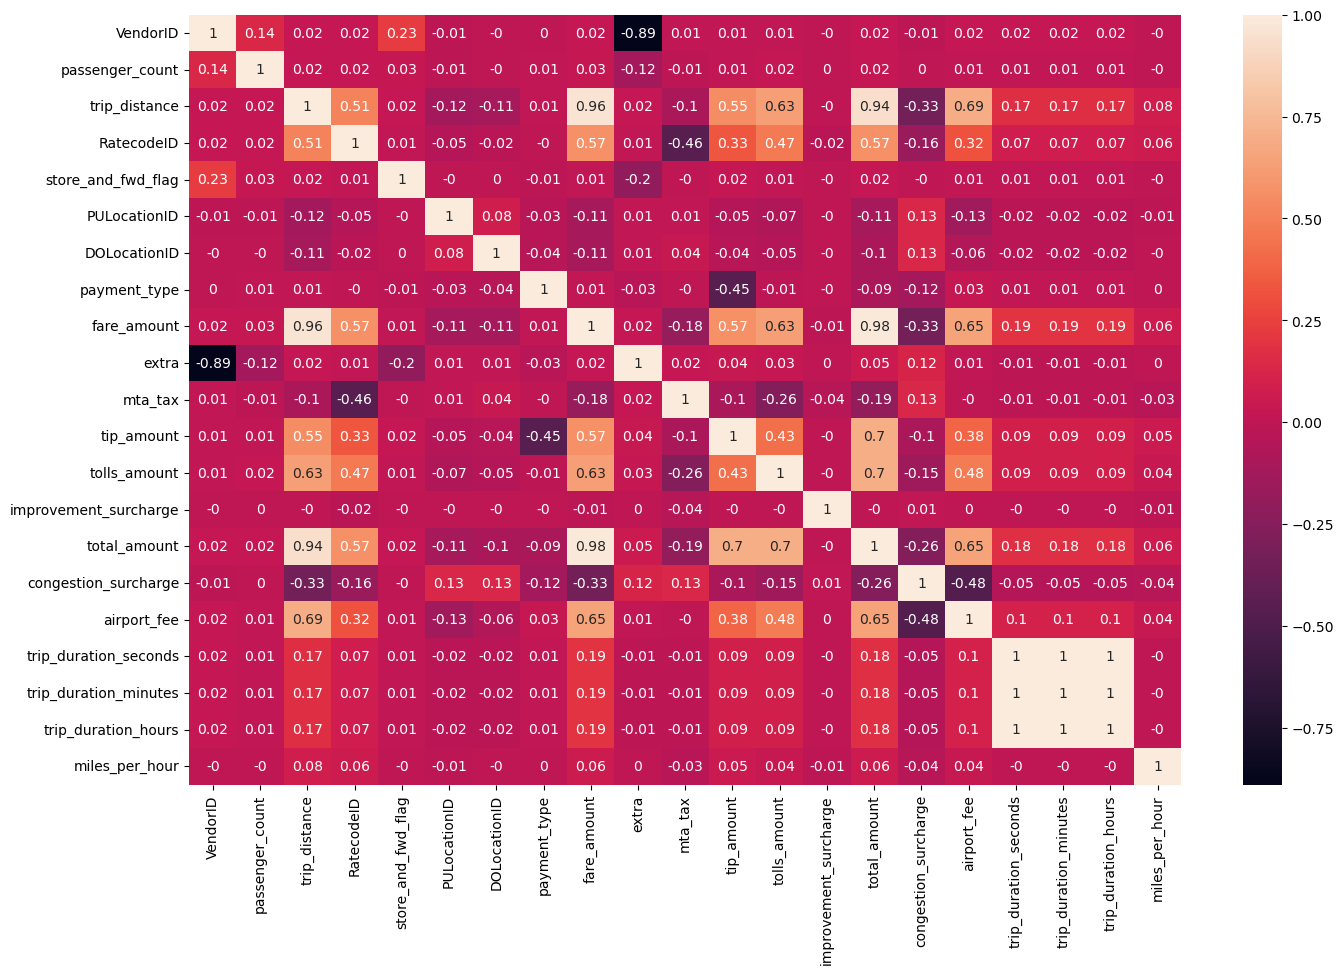

In [52]:
plt.figure(figsize = (16,10))
dataplot=sns.heatmap(round(raw_df.corr(),2),annot=True)

In [53]:
test =  test[test.trip_duration_minutes <= np.quantile(raw_df.trip_duration_minutes,0.99)]

In [54]:
test['price_without_tip'] = test['total_amount'] - test['tip_amount']

In [63]:
test['log_trip_distane'] = np.log(test['trip_distance'])
test['log1p_trip_distance'] = np.log1p(test['trip_distance'])
test['price_per_mile'] = test['price_without_tip'] / test['trip_distance']
test['log_price_per_mile'] = np.log(test['price_per_mile'])
test['log1p_price_per_mile'] = np.log1p(test['price_per_mile'])

<AxesSubplot:xlabel='trip_duration_minutes', ylabel='trip_distance'>

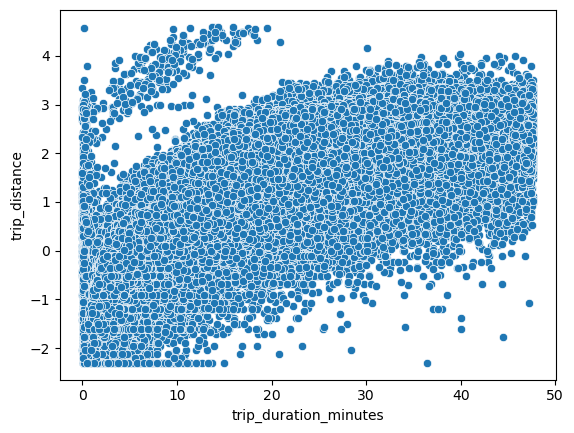

In [55]:
sns.scatterplot( x=test['trip_duration_minutes'], y=np.log(test['trip_distance']))

<AxesSubplot:xlabel='trip_duration_minutes', ylabel='price_per_mile'>

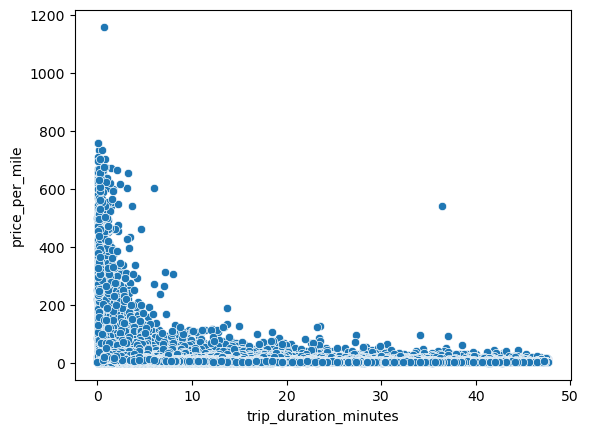

In [65]:
sns.scatterplot( x=test['trip_duration_minutes'], y=test['price_per_mile'])

<AxesSubplot:xlabel='trip_duration_minutes', ylabel='price_per_mile'>

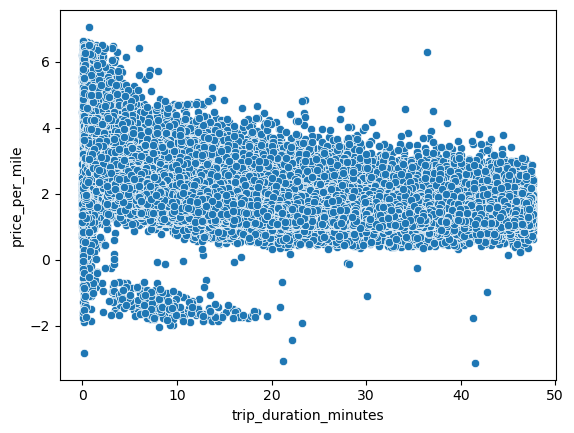

In [62]:
sns.scatterplot( x=test['trip_duration_minutes'], y=np.log(test['price_per_mile']))

<AxesSubplot:xlabel='trip_duration_minutes', ylabel='tip_amount'>

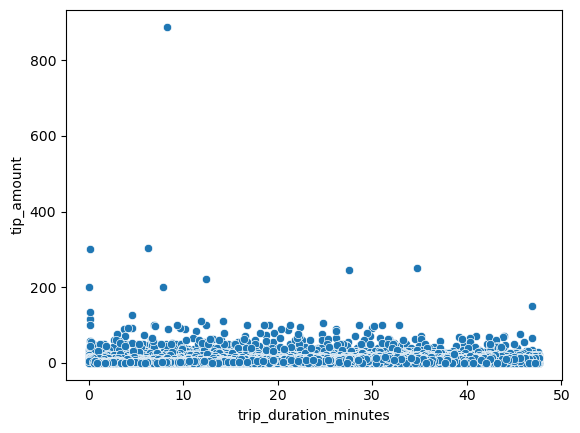

In [67]:
sns.scatterplot( x=test['trip_duration_minutes'], y=test['tip_amount'])

<AxesSubplot:xlabel='trip_duration_minutes', ylabel='tip_amount'>

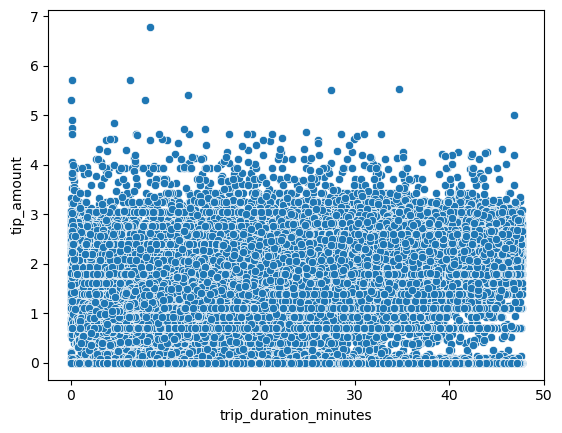

In [68]:
sns.scatterplot( x=test['trip_duration_minutes'], y=np.log1p(test['tip_amount']))

In [ ]:
test['log_tip_amount'] = np.log(test['tip_amount'])
test['log10_tip_amount'] = np.log10(test['tip_amount'])

<AxesSubplot:xlabel='trip_duration_minutes', ylabel='miles_per_hour'>

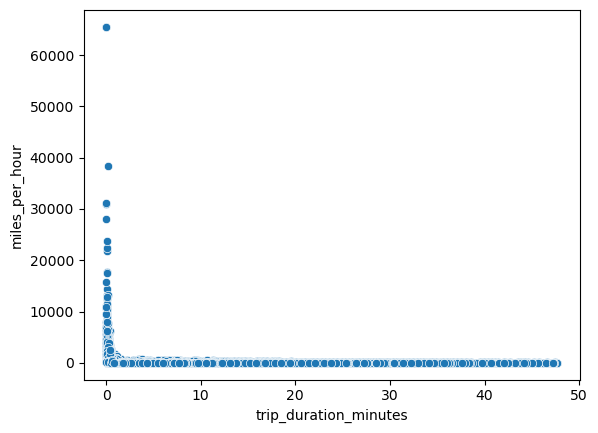

In [75]:
sns.scatterplot( x=test['trip_duration_minutes'], y=test['miles_per_hour'])

<AxesSubplot:xlabel='trip_duration_minutes', ylabel='miles_per_hour'>

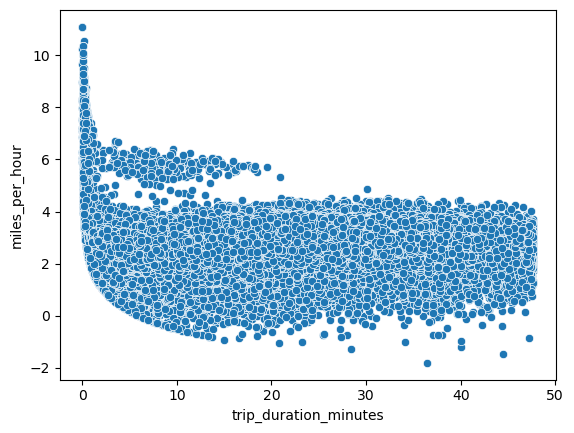

In [78]:
sns.scatterplot( x=test['trip_duration_minutes'], y=np.log(test['miles_per_hour']))

In [80]:
test['miles_per_minute'] = test['trip_distance'] / test['trip_duration_minutes']

<AxesSubplot:xlabel='trip_duration_minutes', ylabel='miles_per_minute'>

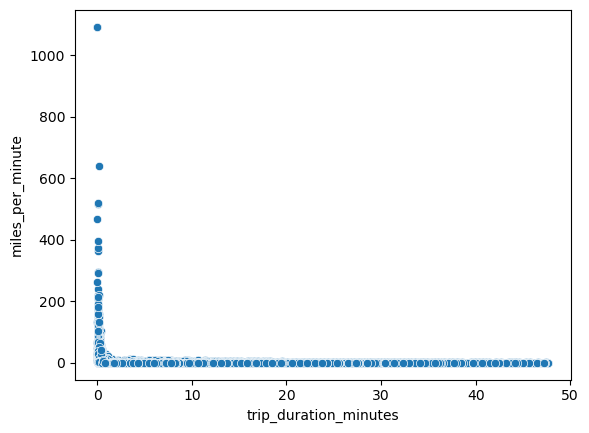

In [81]:
sns.scatterplot( x=test['trip_duration_minutes'], y=test['miles_per_minute'])

<AxesSubplot:xlabel='trip_duration_minutes', ylabel='miles_per_minute'>

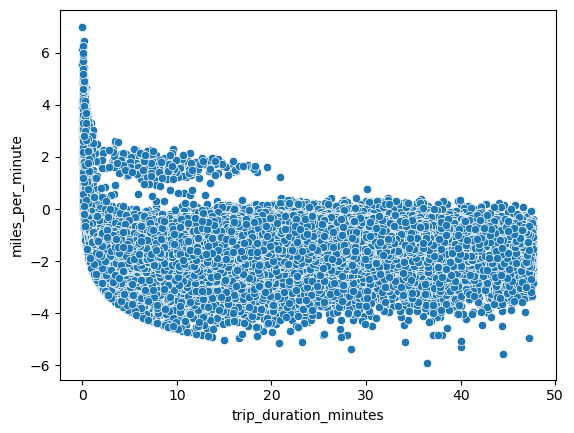

In [82]:
sns.scatterplot( x=test['trip_duration_minutes'], y=np.log(test['miles_per_minute']))

In [89]:
short_rides = test[test['trip_duration_minutes'] <= 2]

short_rides['trip_distance'].describe()

count   27090.00000
mean        0.53400
std         1.41284
min         0.10000
25%         0.29000
50%         0.40000
75%         0.51000
max        96.00000
Name: trip_distance, dtype: float64

In [90]:
short_rides['miles_per_hour'].describe()

count   27090.00000
mean            inf
std             NaN
min         3.02521
25%        11.61290
50%        15.92920
75%        20.63415
max             inf
Name: miles_per_hour, dtype: float64

In [97]:
round(short_rides['miles_per_hour']).value_counts(ascending=False)

13.00000      1678
16.00000      1566
12.00000      1562
10.00000      1502
15.00000      1500
              ... 
1872.00000       1
6326.00000       1
1280.00000       1
2417.00000       1
357.00000        1
Name: miles_per_hour, Length: 644, dtype: int64

<AxesSubplot:xlabel='trip_duration_minutes'>

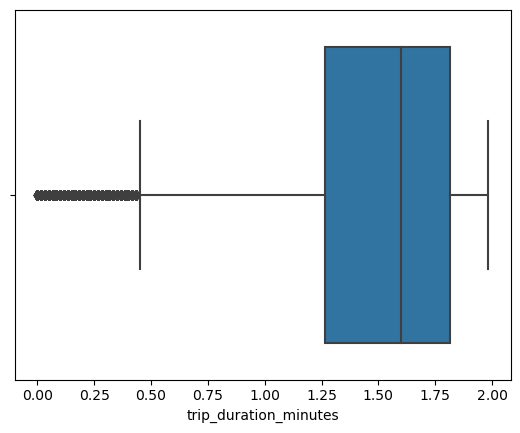

In [91]:
sns.boxplot(x=short_rides['trip_duration_minutes'])

<AxesSubplot:xlabel='miles_per_minute'>

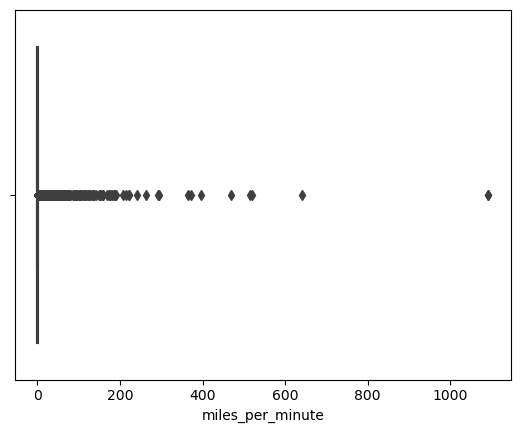

In [92]:
sns.boxplot(x=short_rides['miles_per_minute'])

In [100]:
test['miles_per_hour'].isna().count()

2305658

In [101]:
test = test[test['miles_per_hour'] <= 60]

In [102]:
test['trip'].isna().count()

2304063

- **vendor id**: 1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.
    -> filter out other values if exists
- **tpep_pickup_datetime/tpep_dropoff_datetime**: in future to split to date and time 
    - check for data not within the required month.
    - think how to deal with 
- **trip distance**: trip distance, check for outliers
- **passenger count**:
    - limit to the ones that hold no more than 5. 
    - think how to deal with nan values
- **RatecodeID** - map if required (maybe limit to standard rate only for MVP):
    1= Standard rate
    2=JFK
    3=Newark
    4=Nassau or Westchester
    5=Negotiated fare
    6=Group ride
- **store and fwd flag**: This flag indicates whether the trip record was held in vehicle
memory before sending to the vendor, aka “store and forward,”
because the vehicle did not have a connection to the server. 
    - think how to deal with it, maybe take only N values.
- **PU location** - pickup location, codes titles can be found on web.
- **Do location** - drop off location, code titles can be found on web.
- **payment type**:  
    1= Credit card
    2= Cash
    3= No charge
    4= Dispute
    5= Unknown
    6= Voided trip
    - maybe to have only trips that has credid card/cash for MVP
<!-- - **fare amount**: The time-and-distance fare calculated by the meter. -->
- **Extra** : Miscellaneous extras and surcharges. Currently, this only includes
        the $0.50 and $1 rush hour and overnight charges
- **MTA TAX**: $0.50 MTA tax that is automatically triggered based on the metered
rate in use.
- **Improvement Surcharge**: $0.30 improvement surcharge assessed trips at the flag drop. The
improvement surcharge began being levied in 2015.
<!-- - **tip amount**: Tip amount – This field is automatically populated for credit card
tips. Cash tips are not included -->
<!-- - **tolls_amount** : Total amount of all tolls paid in trip.
- **total amount**: The total amount charged to passengers. Does not include cash tips. -->
<!-- - **Congestion_Surcharge**: Total amount collected in trip for NYS congestion surcharge.
- **Airport_fee**: $1.25 for pick up only at LaGuardia and John F. Kennedy Airports -->



Columns that could be created:
- Trip duration : TARGET -> dropoff datetime - pickuptime, measured in seconds
- is_rush_hour: number of trips per hour, identify rush hours, boolean value 
- is weekend
- is holiday
- is working hours
- morning/afternoon/evening/night
- year



additional datasets to enrichen data:
- weather dataset ?

---------
questions
---------
* how to deal with datime column? split to year/month/day/hour/minute/second ? | how to properly encode datetime values for linear models/


------
feature selection -> RFE - recursice feature elemination
------
sujungti pora datasetu ir sample 50%

scikit learn njobs=-1

wandb - sklearn duomenu vizualizavimui


decision tree regressor

redefined business problem:
To create model predicting trip duration on 24th 25th and 26th of december during, valuating post covid years (2021-2022).

-----  
tasks to do today:
* perform feature engineering to add date-related columns
* update scraper to extract and save only 24th 25th 26th of december data
* evaluate if different years can be compared in between each other (prove that data during diferent years is similar)
* define the pipeline to clean and transform datasets from raw to clean
* merge all datasets, shuffle and create train/test/val split.

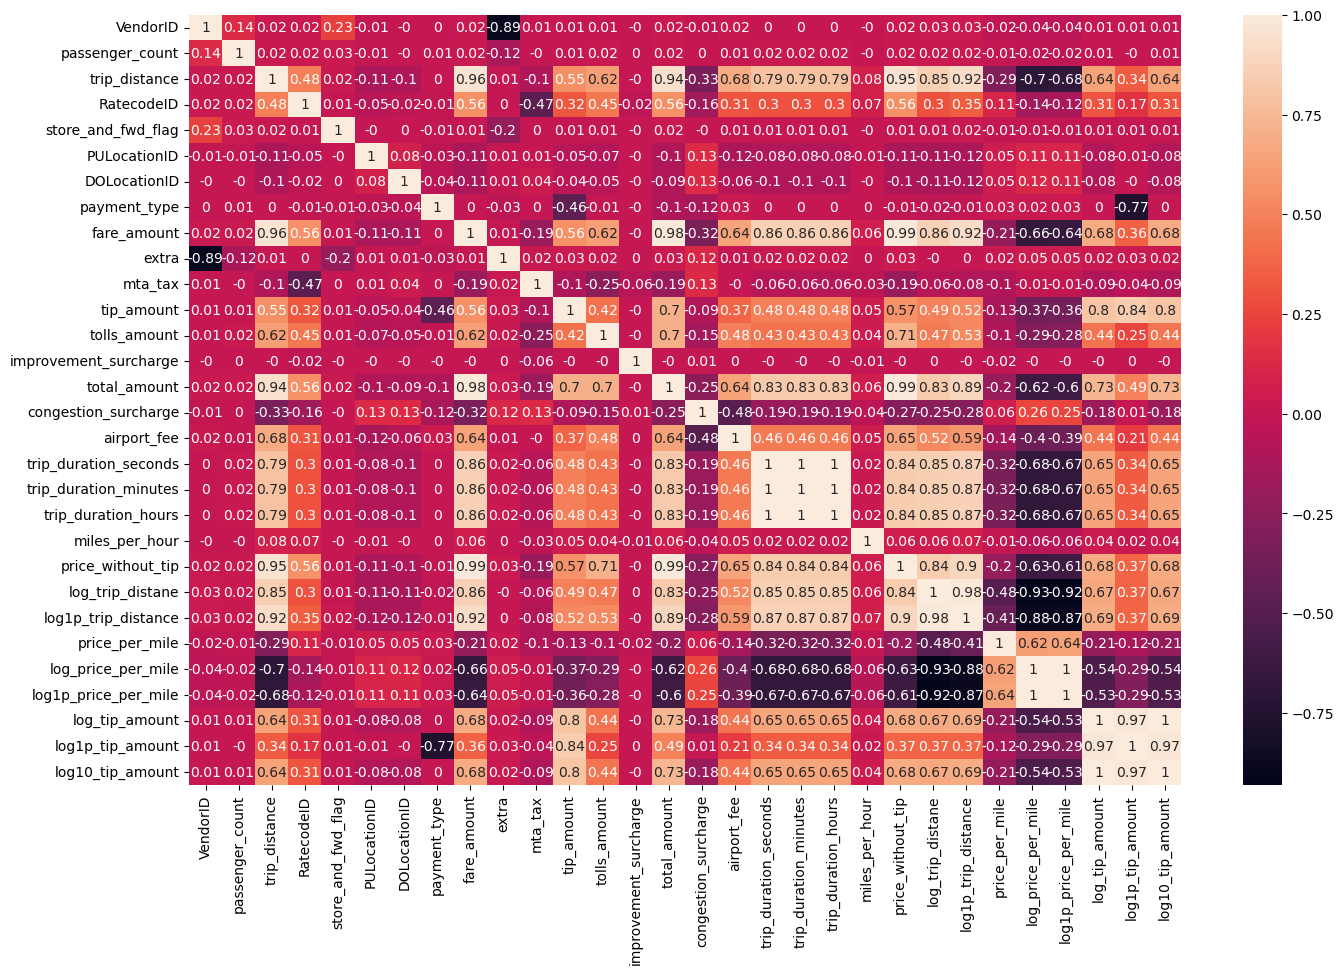

In [74]:
plt.figure(figsize = (16,10))
dataplot=sns.heatmap(round(test.corr(),2),annot=True)

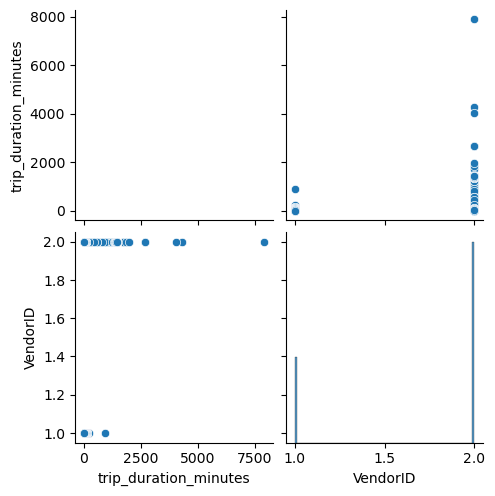

In [200]:
sns.pairplot(raw_df[['trip_duration_minutes', 'VendorID']])

In [ ]:
sns.pairplot(raw_df[['trip_duration_minutes', 'trip_distance']])

In [202]:
test = raw_df[['trip_duration_minutes', 'trip_distance']]

In [214]:
test['log_trip_distance'] = np.log1p(test.trip_distance)

C:\Users\G026361\AppData\Local\Temp\ipykernel_1532\1038906138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['log_trip_distance'] = np.log1p(test.trip_distance)


In [215]:
test.corr()

,trip_duration_minutes,trip_distance,log_trip_distance
trip_duration_minutes,1.00000,0.17112,0.18240
trip_distance,0.17112,1.00000,0.91965
log_trip_distance,0.18240,0.91965,1.00000


<AxesSubplot:xlabel='trip_duration_minutes', ylabel='trip_distance'>

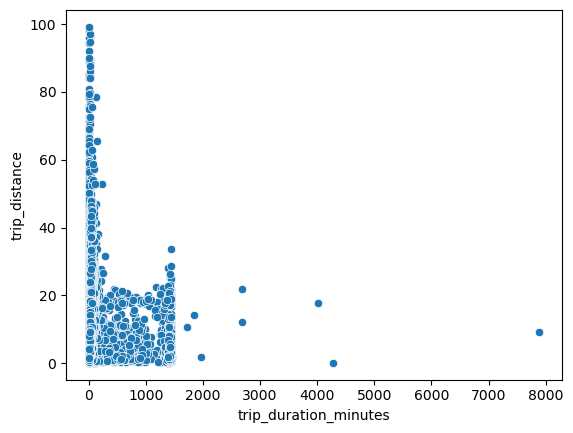

In [219]:
sns.scatterplot(data=test, x='trip_duration_minutes', y='trip_distance')

0